In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [51]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [52]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


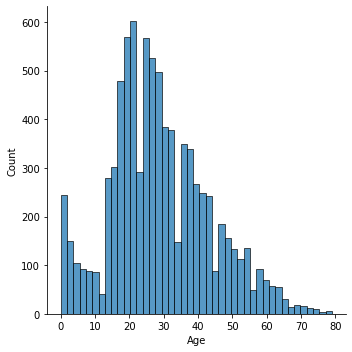

In [53]:
sns.displot(train["Age"])

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [55]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [56]:
train.drop(["Cabin", "Name"], axis=1, inplace=True)

In [57]:
print(train["HomePlanet"].unique())
print(train["CryoSleep"].unique())
print(train["Destination"].unique())
print(train["VIP"].unique())
print(train["Transported"].unique())

['Europa' 'Earth' 'Mars' nan]
[False True nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
[False True nan]
[False  True]


In [58]:
labelencoder = LabelEncoder()
train["homeplanet"] = labelencoder.fit_transform(train["HomePlanet"])
train["cryosleep"] = labelencoder.fit_transform(train["CryoSleep"])
train["destination"] = labelencoder.fit_transform(train["Destination"])
train["vip"] = labelencoder.fit_transform(train["VIP"])
train["transported"] = labelencoder.fit_transform(train["Transported"])

In [59]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,homeplanet,cryosleep,destination,vip,transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,2,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,2,0,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,2,1,0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,2,0,0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,2,0,1


In [60]:
train.drop(["HomePlanet", "CryoSleep", "Destination", "VIP", "Transported"], axis=1, inplace=True)

In [61]:
train.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,homeplanet,cryosleep,destination,vip,transported
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,1,0,2,0,0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,0,0,2,0,1
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,2,1,0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,2,0,0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,0,0,2,0,1


In [66]:
train["homeplanet"].fillna(int(train["homeplanet"].mean()), inplace=True)
train["cryosleep"].fillna(int(train["cryosleep"].mean()), inplace=True)
train["destination"].fillna(int(train["destination"].mean()), inplace=True)
train["Age"].fillna(int(train["Age"].mean()), inplace=True)
train["vip"].fillna(int(train["vip"].mean()), inplace=True)
train["RoomService"].fillna(int(train["RoomService"].mean()), inplace=True)
train["FoodCourt"].fillna(int(train["FoodCourt"].mean()), inplace=True)
train["ShoppingMall"].fillna(int(train["ShoppingMall"].mean()), inplace=True)
train["Spa"].fillna(int(train["Spa"].mean()), inplace=True)
train["VRDeck"].fillna(int(train["VRDeck"].mean()), inplace=True)

In [67]:
train.isnull().sum()

PassengerId     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
homeplanet      0
cryosleep       0
destination     0
vip             0
transported     0
dtype: int64

In [76]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,homeplanet,cryosleep,destination,vip,transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.810882,224.673300,458.075578,173.711722,311.135856,304.836305,0.719199,0.399287,1.515242,0.069596,0.503624
std,14.339536,659.739371,1594.434978,597.417450,1124.675871,1133.259056,0.863402,0.538345,0.840148,0.333871,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000,1.000000,1.000000,2.000000,0.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,3.000000,2.000000,3.000000,2.000000,1.000000


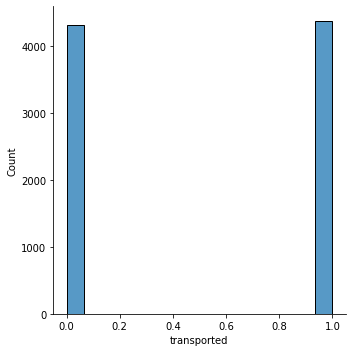

In [68]:
sns.displot(train["transported"])

In [70]:
transported_count = train["transported"].value_counts()
transported_percent = transported_count / len(train)
print(transported_count)
print(transported_percent)

1    4378
0    4315
Name: transported, dtype: int64
1    0.503624
0    0.496376
Name: transported, dtype: float64


## Splitting the data

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X =  train.drop("transported", axis=1)
y = train["transported"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [72]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [73]:
X_train

array([[0.87594322, 0.05063291, 0.        , ..., 0.        , 0.66666667,
        0.        ],
       [0.01832289, 0.40506329, 0.        , ..., 0.5       , 0.66666667,
        0.        ],
       [0.52899275, 0.53164557, 0.        , ..., 0.        , 0.66666667,
        0.        ],
       ...,
       [0.94546137, 0.30379747, 0.        , ..., 0.5       , 0.66666667,
        0.        ],
       [0.61263245, 0.3164557 , 0.09841558, ..., 0.        , 0.        ,
        0.        ],
       [0.3369257 , 0.18987342, 0.00432749, ..., 0.        , 0.        ,
        0.        ]])

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()

lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_val)

print(classification_report(y_val, lr_predictions))
print(confusion_matrix(y_val, lr_predictions))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       845
           1       0.80      0.73      0.76       894

    accuracy                           0.76      1739
   macro avg       0.77      0.77      0.76      1739
weighted avg       0.77      0.76      0.76      1739

[[678 167]
 [243 651]]


### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

error_list = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_val)
    error_list.append(np.mean(knn_predictions != y_val))

error_list

[0.2783208740655549,
 0.27544565842438185,
 0.24784358826912017,
 0.24669350201265094,
 0.23749281196089705,
 0.24094307073030477,
 0.24324324324324326,
 0.25014376078205863,
 0.2449683726279471,
 0.24381828637147787,
 0.23634272570442783,
 0.24036802760207016,
 0.24151811385853938,
 0.24094307073030477,
 0.242093156986774,
 0.24324324324324326,
 0.24324324324324326,
 0.242093156986774,
 0.23921794134560093,
 0.24324324324324326,
 0.24611845888441633,
 0.24669350201265094,
 0.2386428982173663,
 0.24669350201265094,
 0.24151811385853938,
 0.23979298447383554,
 0.24094307073030477,
 0.24094307073030477,
 0.23921794134560093,
 0.242093156986774,
 0.24266820011500861,
 0.2386428982173663,
 0.24324324324324326,
 0.24094307073030477,
 0.24094307073030477,
 0.23749281196089705,
 0.24036802760207016,
 0.242093156986774,
 0.24266820011500861]

10


0.23634272570442783

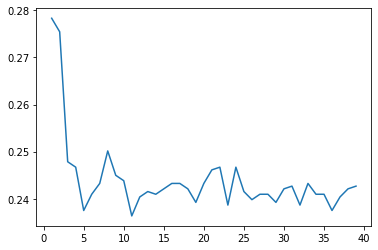

In [79]:
plt.plot(range(1,40), error_list)

print(np.argmin(error_list))
error_list[10]

In [80]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_val)

print(classification_report(y_val, knn_predictions))
print(confusion_matrix(y_val, knn_predictions))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       845
           1       0.81      0.69      0.74       894

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739

[[699 146]
 [278 616]]


## SVM

In [81]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

svm_predictions = svm.predict(X_val)

print(classification_report(y_val, svm_predictions))
print(confusion_matrix(y_val, svm_predictions))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       845
           1       0.82      0.71      0.76       894

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739

[[706 139]
 [262 632]]


### GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {"C":[0.1,1,10,50,100,1000], "gamma":[1,0.1,0.001,0.0001,0.00001,0.000001]}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_val)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .....................................C=0.1, gamma=1; total time=   1.8s
[CV] END .....................................C=0.1, gamma=1; total time=   2.6s
[CV] END .....................................C=0.1, gamma=1; total time=   1.9s
[CV] END .....................................C=0.1, gamma=1; total time=   2.0s
[CV] END .....................................C=0.1, gamma=1; total time=   2.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.1s
[CV] END ...................................C=0.1, gamma=0.1; total time=   3.3s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   3.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   2.4s
[CV] END .................................C=0.1, gamma=0.001; total time=   3.6s
[CV] END .................................C=0.1

[CV] END ..................................C=50, gamma=0.001; total time=   1.9s
[CV] END ..................................C=50, gamma=0.001; total time=   3.1s
[CV] END ..................................C=50, gamma=0.001; total time=   1.9s
[CV] END ..................................C=50, gamma=0.001; total time=   3.2s
[CV] END .................................C=50, gamma=0.0001; total time=   2.9s
[CV] END .................................C=50, gamma=0.0001; total time=   3.8s
[CV] END .................................C=50, gamma=0.0001; total time=   2.8s
[CV] END .................................C=50, gamma=0.0001; total time=   3.5s
[CV] END .................................C=50, gamma=0.0001; total time=   4.1s
[CV] END ..................................C=50, gamma=1e-05; total time=   3.5s
[CV] END ..................................C=50, gamma=1e-05; total time=   3.5s
[CV] END ..................................C=50, gamma=1e-05; total time=   4.0s
[CV] END ...................

In [84]:
print(classification_report(y_val, grid_predictions))
print(confusion_matrix(y_val, grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       845
           1       0.81      0.79      0.80       894

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

[[678 167]
 [184 710]]


### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

dt_predictions = dt.predict(X_val)

print(classification_report(y_val, dt_predictions))
print(confusion_matrix(y_val, dt_predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       845
           1       0.74      0.75      0.75       894

    accuracy                           0.74      1739
   macro avg       0.74      0.74      0.74      1739
weighted avg       0.74      0.74      0.74      1739

[[609 236]
 [222 672]]


### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

rf_predictions = rf.predict(X_val)

print(classification_report(y_val, rf_predictions))
print(confusion_matrix(y_val, rf_predictions))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       845
           1       0.82      0.79      0.80       894

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739

[[688 157]
 [189 705]]
